# Postdam PM2.5 Baseline Forcasting

Between 2013 and 2023, data collected by DEBB021 was used. 

To increase the accuracy of PM2.5 data estimation, NO2, O3, SO2, PM10 pollutant gas data accepted by the EEA was added.


In [1]:
# imports
import os
import pandas as pd
os.chdir('..')
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

## Data Exploration

* Load Data


In [2]:
df = pd.read_csv('data/CLEAN_MERGED_DE_DEBB021.csv')
df.head()

,Start,End,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,PM10-Value,PM10-Unit,...,O3-Pollutant,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
0,2013-01-01 00:00:00,2013-01-01 01:00:00,6001,71.04,ug.m-3,1,1,5,88.96,ug.m-3,...,7,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1
1,2013-01-01 01:00:00,2013-01-01 02:00:00,6001,20.52,ug.m-3,1,1,5,25.17,ug.m-3,...,7,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1
2,2013-01-01 02:00:00,2013-01-01 03:00:00,6001,9.56,ug.m-3,1,1,5,11.97,ug.m-3,...,7,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1
3,2013-01-01 03:00:00,2013-01-01 04:00:00,6001,9.45,ug.m-3,1,1,5,11.73,ug.m-3,...,7,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1
4,2013-01-01 04:00:00,2013-01-01 05:00:00,6001,13.02,ug.m-3,1,1,5,15.88,ug.m-3,...,7,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PM2.5-Pollutant,87648.0,6001.000000,0.000000,6001.000000,6001.000000,6001.00,6001.000000,6001.00
PM2.5-Value,87648.0,13.033408,10.184146,0.770000,6.000000,10.03,17.000000,194.00
PM2.5-Validity,87648.0,1.005545,0.149514,-1.000000,1.000000,1.00,1.000000,2.00
PM2.5-Verification,87648.0,1.000011,0.003378,1.000000,1.000000,1.00,1.000000,2.00
PM10-Pollutant,87648.0,5.000000,0.000000,5.000000,5.000000,5.00,5.000000,5.00
PM10-Value,87648.0,17.865347,12.494111,0.800000,9.300000,14.91,23.200000,705.30
PM10-Validity,87648.0,0.997456,0.123482,-1.000000,1.000000,1.00,1.000000,2.00
PM10-Verification,87648.0,1.000011,0.003378,1.000000,1.000000,1.00,1.000000,2.00
NO2-Pollutant,87648.0,8.000000,0.000000,8.000000,8.000000,8.00,8.000000,8.00
NO2-Value,87648.0,16.227412,11.761785,0.954999,7.900000,13.00,21.194304,134.09


In [4]:
df.set_index('Start', inplace=True)
df.head()

,End,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,PM10-Value,PM10-Unit,PM10-Validity,...,O3-Pollutant,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
Start,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,2013-01-01 01:00:00,6001,71.04,ug.m-3,1,1,5,88.96,ug.m-3,1,...,7,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1
2013-01-01 01:00:00,2013-01-01 02:00:00,6001,20.52,ug.m-3,1,1,5,25.17,ug.m-3,1,...,7,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1
2013-01-01 02:00:00,2013-01-01 03:00:00,6001,9.56,ug.m-3,1,1,5,11.97,ug.m-3,1,...,7,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1
2013-01-01 03:00:00,2013-01-01 04:00:00,6001,9.45,ug.m-3,1,1,5,11.73,ug.m-3,1,...,7,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1
2013-01-01 04:00:00,2013-01-01 05:00:00,6001,13.02,ug.m-3,1,1,5,15.88,ug.m-3,1,...,7,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1


In [5]:
# Naive Forecast
df['Forcasted-PM2.5-Value'] = df['PM2.5-Value'].shift(1)

df.head()

,End,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,PM10-Value,PM10-Unit,PM10-Validity,...,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification,Forcasted-PM2.5-Value
Start,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,2013-01-01 01:00:00,6001,71.04,ug.m-3,1,1,5,88.96,ug.m-3,1,...,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1,NaN
2013-01-01 01:00:00,2013-01-01 02:00:00,6001,20.52,ug.m-3,1,1,5,25.17,ug.m-3,1,...,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1,71.04
2013-01-01 02:00:00,2013-01-01 03:00:00,6001,9.56,ug.m-3,1,1,5,11.97,ug.m-3,1,...,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1,20.52
2013-01-01 03:00:00,2013-01-01 04:00:00,6001,9.45,ug.m-3,1,1,5,11.73,ug.m-3,1,...,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1,9.56
2013-01-01 04:00:00,2013-01-01 05:00:00,6001,13.02,ug.m-3,1,1,5,15.88,ug.m-3,1,...,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1,9.45


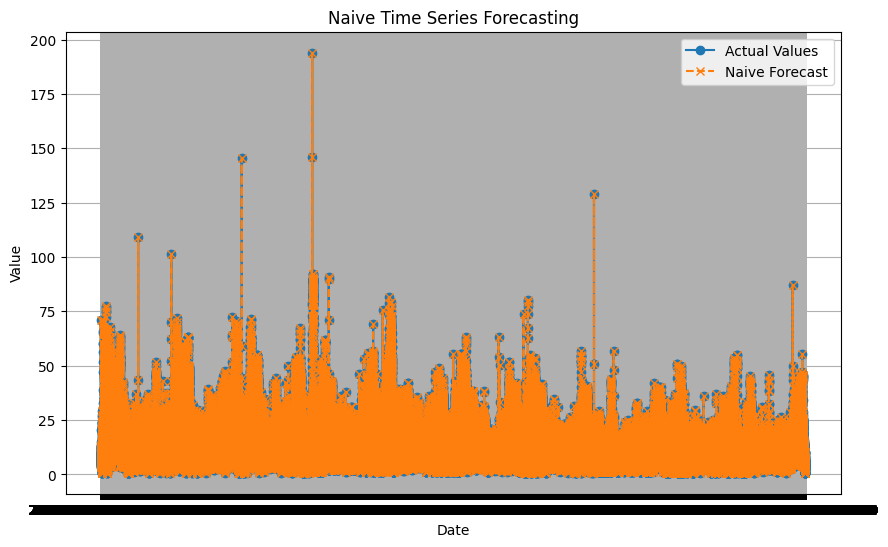

In [6]:
# Plotting the actual vs. forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['PM2.5-Value'], label='Actual Values', marker='o')
plt.plot(df['Forcasted-PM2.5-Value'], label='Naive Forecast', linestyle='--', marker='x')
plt.title('Naive Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## Error Metrics

* Mean Absolute Error (MAE): MAE measures the average absolute difference between the predicted values and the actual values. Lower MAE values indicate better accuracy.

* Mean Squared Error (MSE): MSE measures the average squared difference between predicted and actual values. It penalizes larger errors more heavily than MAE. Lower MSE values indicate better accuracy.

* Root Mean Squared Error (RMSE): RMSE is the square root of the MSE. It provides an interpretable measure in the same units as the original data. Lower RMSE values indicate better accuracy.

* Mean Absolute Percentage Error (MAPE): MAPE calculates the average percentage difference between predicted and actual values. It is expressed as a percentage. Lower MAPE values indicate better accuracy. However, be cautious with MAPE when dealing with small or zero actual values, as it can result in division by zero.

* Mean Absolute Scaled Error (MASE): MASE measures the relative accuracy of a forecasting model compared to a naive forecast (e.g., using the previous period's value). A MASE value of less than 1 suggests that the model is better than the naive forecast.


In [7]:
# Drop the first row since it doesn't have a forecast
df = df.dropna()

# Calculate error metrics
mae = np.mean(np.abs(df['PM2.5-Value'] - df['Forcasted-PM2.5-Value']))
mse = np.mean((df['PM2.5-Value'] - df['Forcasted-PM2.5-Value'])**2)
rmse = np.sqrt(mse)

# Calculate MASE
# Since we already shifted the 'value' column to get the 'forecast' column for the naive forecast,
# we can just reuse the previously calculated 'mae' for the naive method.
# Since we're using the naive forecast itself, the MAE of the model is the same as the naive MAE.
# In general, you would calculate MAE for your actual forecast method.
mase = mae / mae

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Scaled Error (MASE): {mase:.2f}")

Mean Absolute Error (MAE): 1.27
Mean Squared Error (MSE): 5.40
Root Mean Squared Error (RMSE): 2.32
Mean Absolute Scaled Error (MASE): 1.00
